**THE ALGORITHM CAN BE PARALLELIZED, FOR EXAMPLE, BY USING THE PREVIOUS CASE AND ASSIGNING PROBABILITY VALUES AS INDICATED IN THE TABLE 7. THE BAYESIAN NETWORK IS EXECUTED USING ALL THE AVAILABLE EVIDENCE. THE RESULTING VALUES ARE PRESENTED IN THE FIRST COLUMN, LABELED DFJ.**

FIRST PART: CREATION OF BAYESIAN NETWORK AND CALCULATION OF PROBABILITY VALUES USING THE STANDARD METHOD

SECOND PART: SUBROUTINES OF THE NEW METHOD FOR SOLVING BAYESIAN NETWORKS

THIRD PART: CALCULATION OF PROBABILITIES IN BAYESIAN NETWORK USING THE NEW METHOD

FOURTH PART: CALCULATION OF PROBABILITIES IN BAYESIAN NETWORK USING THE NEW METHOD CONSIDERING THAT THE NETWORK IS DIVIDED INTO TWO PARTS



**FIRST PART: CREATION OF BAYESIAN NETWORK AND CALCULATION OF PROBABILITY VALUES USING THE STANDARD METHOD**

In [1]:
!pip  install pyagrum       # instalacion de libreria
import pyagrum as gum

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 24.8 MB/s eta 0:00:00


In [2]:
import pyagrum.lib.notebook as gnb

In [3]:
import numpy as np          # importar  librerias  numericas de python
import matplotlib.pyplot as plt

In [4]:
import pandas as pd


Bayesian Network Construction

In [5]:
R0=['A',['A'],[],[0.998,0.002]]
R1=['B',['B'],[],[0.999,0.001]]
R2=['C',['C'],[],[0.997,0.003]]
R3=['D',['D'],[],[0.99,0.010]]
R4=['E',['E'],[],[0.999,0.001]]
R5=['F',['F'],[],[0.99,0.010]]
R6=['G',['G'],['D','F'],[0.6,0.4,0.3,0.7,0.2,0.8,0.1,0.9]]
R7=['H',['H'],['E','G'],[0.8,0.2,0.2,0.8,0.2,0.8,0.2,0.8]]
R8=['I',['I'],['A','H'],[0.8,0.2,0.8,0.2,0.8,0.2,0.2,0.8]]
R9=['J',['J'],['C','I'],[0.8,0.2,0.2,0.8,0.2,0.8,0.2,0.8]]
R10=['K',['K'],['B','J'],[0.8,0.2,0.2,0.8,0.2,0.8,0.2,0.8]]
Red=[R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10]

In [6]:
bn=gum.BayesNet()
var={}      # aqui se construye la red bayesiana , definiendo las las variables , se genera un diccionario para tener localizadas las variables
j=0
for i in Red:
  bn.add(i[0], 2)
  var[i[0]]=j
  j=j+1
print(var)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10}


In [7]:
for i in Red:                  # definicion d elos arcos entre las variables, aqui se ve porque tuve que hacer el diccionario
  ind=len(i[2])
  if ind>0:
    for j in range(0,ind):
      var1=var[i[0]]
      var2=var[i[2][j]]
      bn.addArc(var2,var1)

In [8]:
for i in Red:                     # poner las probabilidades condicionales en la red bayesiana
  ind=len(i[2])
  if ind==0:
    t=[i[3][0],i[3][1]]
    t1=var[i[0]]
    bn.cpt(t1).fillWith(t)


  elif ind==1:
    t1=var[i[0]]
    bn.cpt(t1)[{i[2][0]:0}]=[i[3][0],i[3][1]]
    bn.cpt(t1)[{i[2][0]:1}]=[i[3][2],i[3][3]]


  elif ind==2:
    t1=var[i[0]]
    bn.cpt(t1)[{i[2][0]:0,i[2][1]:0}]=[i[3][0],i[3][1]]
    bn.cpt(t1)[{i[2][0]:0,i[2][1]:1}]=[i[3][2],i[3][3]]
    bn.cpt(t1)[{i[2][0]:1,i[2][1]:0}]=[i[3][4],i[3][5]]
    bn.cpt(t1)[{i[2][0]:1,i[2][1]:1}]=[i[3][6],i[3][7]]


  elif ind==3:
    t1=var[i[0]]
    bn.cpt(t1)[{i[2][0]:0,i[2][1]:0,i[2][2]:0}]=[i[3][0],i[3][1]]
    bn.cpt(t1)[{i[2][0]:0,i[2][1]:0,i[2][2]:1}]=[i[3][2],i[3][3]]
    bn.cpt(t1)[{i[2][0]:0,i[2][1]:1,i[2][2]:0}]=[i[3][4],i[3][5]]
    bn.cpt(t1)[{i[2][0]:0,i[2][1]:1,i[2][2]:1}]=[i[3][6],i[3][7]]
    bn.cpt(t1)[{i[2][0]:1,i[2][1]:0,i[2][2]:0}]=[i[3][8],i[3][9]]
    bn.cpt(t1)[{i[2][0]:1,i[2][1]:0,i[2][2]:1}]=[i[3][10],i[3][11]]
    bn.cpt(t1)[{i[2][0]:1,i[2][1]:1,i[2][2]:0}]=[i[3][12],i[3][13]]
    bn.cpt(t1)[{i[2][0]:1,i[2][1]:1,i[2][2]:1}]=[i[3][14],i[3][15]]


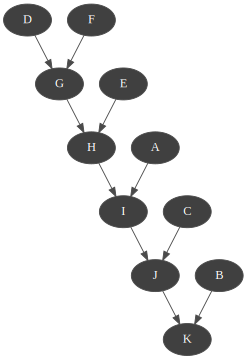

In [9]:
gnb.showBN(bn)

In [10]:
ie=gum.LazyPropagation(bn)
ie

target(s) allEvidence and targets


In [11]:
dict={}
df=pd.DataFrame(dict,index=['A','B','C','D','E','F','G','H','I','J','K'])


In [12]:
nn=[]
for r in Red:
  var=r[0]
  print(ie.posterior(var))
  pp=ie.posterior(var)
  nn.append(round(pp[1],4))
df['MP BN']=nn



  A                |
0        |1        |
---------|---------|
 0.9980  | 0.0020  |


  B                |
0        |1        |
---------|---------|
 0.9990  | 0.0010  |


  C                |
0        |1        |
---------|---------|
 0.9970  | 0.0030  |


  D                |
0        |1        |
---------|---------|
 0.9900  | 0.0100  |


  E                |
0        |1        |
---------|---------|
 0.9990  | 0.0010  |


  F                |
0        |1        |
---------|---------|
 0.9900  | 0.0100  |


  G                |
0        |1        |
---------|---------|
 0.5930  | 0.4070  |


  H                |
0        |1        |
---------|---------|
 0.5555  | 0.4445  |


  I                |
0        |1        |
---------|---------|
 0.7995  | 0.2005  |


  J                |
0        |1        |
---------|---------|
 0.6782  | 0.3218  |


  K                |
0        |1        |
---------|---------|
 0.6065  | 0.3935  |



In [13]:
df

,MP BN
A,0.0020
B,0.0010
C,0.0030
D,0.0100
E,0.0010
F,0.0100
G,0.4070
H,0.4445
I,0.2005
J,0.3218


EVIDENCE D=1

In [14]:
ie.setEvidence({'D':1})
ie.makeInference()
nn=[]
for r in Red:
  var=r[0]
  print(ie.posterior(var))
  pp=ie.posterior(var)
  nn.append(round(pp[1],4))
df['D BN']=nn


  A                |
0        |1        |
---------|---------|
 0.9980  | 0.0020  |


  B                |
0        |1        |
---------|---------|
 0.9990  | 0.0010  |


  C                |
0        |1        |
---------|---------|
 0.9970  | 0.0030  |


  D                |
0        |1        |
---------|---------|
 0.0000  | 1.0000  |


  E                |
0        |1        |
---------|---------|
 0.9990  | 0.0010  |


  F                |
0        |1        |
---------|---------|
 0.9900  | 0.0100  |


  G                |
0        |1        |
---------|---------|
 0.1990  | 0.8010  |


  H                |
0        |1        |
---------|---------|
 0.3193  | 0.6807  |


  I                |
0        |1        |
---------|---------|
 0.7992  | 0.2008  |


  J                |
0        |1        |
---------|---------|
 0.6781  | 0.3219  |


  K                |
0        |1        |
---------|---------|
 0.6064  | 0.3936  |



EVIDENCE D=1 F=1

In [15]:
ie.setEvidence({'F':1,'D':1})
ie.makeInference()
nn=[]
for r in Red:
  var=r[0]
  print(ie.posterior(var))
  pp=ie.posterior(var)
  nn.append(round(pp[1],4))
df['DF BN']=nn



  A                |
0        |1        |
---------|---------|
 0.9980  | 0.0020  |


  B                |
0        |1        |
---------|---------|
 0.9990  | 0.0010  |


  C                |
0        |1        |
---------|---------|
 0.9970  | 0.0030  |


  D                |
0        |1        |
---------|---------|
 0.0000  | 1.0000  |


  E                |
0        |1        |
---------|---------|
 0.9990  | 0.0010  |


  F                |
0        |1        |
---------|---------|
 0.0000  | 1.0000  |


  G                |
0        |1        |
---------|---------|
 0.1000  | 0.9000  |


  H                |
0        |1        |
---------|---------|
 0.2599  | 0.7401  |


  I                |
0        |1        |
---------|---------|
 0.7991  | 0.2009  |


  J                |
0        |1        |
---------|---------|
 0.6780  | 0.3220  |


  K                |
0        |1        |
---------|---------|
 0.6064  | 0.3936  |



In [16]:
df

,MP BN,D BN,DF BN
A,0.0020,0.0020,0.0020
B,0.0010,0.0010,0.0010
C,0.0030,0.0030,0.0030
D,0.0100,1.0000,1.0000
E,0.0010,0.0010,0.0010
F,0.0100,0.0100,1.0000
G,0.4070,0.8010,0.9000
H,0.4445,0.6807,0.7401
I,0.2005,0.2008,0.2009
J,0.3218,0.3219,0.3220


EVIDENCE D=1,F=1,J=1

In [17]:
ie.setEvidence({'F':1,'D':1,'J':1})
ie.makeInference()
nn=[]
for r in Red:
  var=r[0]
  print(ie.posterior(var))
  pp=ie.posterior(var)
  nn.append(round(pp[1],4))
df['DFJ BN']=nn



  A                |
0        |1        |
---------|---------|
 0.9964  | 0.0036  |


  B                |
0        |1        |
---------|---------|
 0.9990  | 0.0010  |


  C                |
0        |1        |
---------|---------|
 0.9925  | 0.0075  |


  D                |
0        |1        |
---------|---------|
 0.0000  | 1.0000  |


  E                |
0        |1        |
---------|---------|
 0.9990  | 0.0010  |


  F                |
0        |1        |
---------|---------|
 0.0000  | 1.0000  |


  G                |
0        |1        |
---------|---------|
 0.0999  | 0.9001  |


  H                |
0        |1        |
---------|---------|
 0.2595  | 0.7405  |


  I                |
0        |1        |
---------|---------|
 0.5009  | 0.4991  |


  J                |
0        |1        |
---------|---------|
 0.0000  | 1.0000  |


  K                |
0        |1        |
---------|---------|
 0.2000  | 0.8000  |



In [18]:
df

,MP BN,D BN,DF BN,DFJ BN
A,0.0020,0.0020,0.0020,0.0036
B,0.0010,0.0010,0.0010,0.0010
C,0.0030,0.0030,0.0030,0.0075
D,0.0100,1.0000,1.0000,1.0000
E,0.0010,0.0010,0.0010,0.0010
F,0.0100,0.0100,1.0000,1.0000
G,0.4070,0.8010,0.9000,0.9001
H,0.4445,0.6807,0.7401,0.7405
I,0.2005,0.2008,0.2009,0.4991
J,0.3218,0.3219,0.3220,1.0000


**SECOND PART: SUBROUTINES OF THE NEW METHOD FOR SOLVING BAYESIAN NETWORKS**

CALCULATION OF PROBABILITIES

In [19]:
# generacion de codificacion
def codigo(nn):
  m=2**nn
  mm=list(range(m))
  mb = [bin(num)[2:].zfill(nn) for num in mm]
  return mb


In [20]:
def variable_probability(VAR, var):
    """
    Calcula la probabilidad de que la variable 'var' (por nombre o índice)
    tome el valor 1.

    VAR: lista de dos elementos.
         VAR[0] es la lista de nombres de variables.
         VAR[1] es la lista de probabilidades para cada combinación de valores.
         Se asume que hay 2^n combinaciones para n variables.
    var: puede ser el nombre de la variable (str) o su índice (int).
    """
    variables = VAR[0]
    probs = VAR[1]
    n = len(variables)

    # Determinamos el índice de la variable si se pasó como nombre
    if isinstance(var, str):
        try:
            i = variables.index(var)
        except ValueError:
            raise ValueError(f"La variable {var} no se encuentra en la lista de variables.")
    elif isinstance(var, int):
        if 0 <= var < n:
            i = var
        else:
            raise ValueError(f"El índice debe estar entre 0 y {n-1}")
    else:
        raise ValueError("El parámetro 'var' debe ser un nombre (str) o un índice (int).")

    prob_sum = 0
    # Recorremos cada combinación representada por su índice j
    for j, p in enumerate(probs):
        # Convertimos j en binario y revisamos la posición correspondiente a la variable.
        # La variable en posición i corresponde al bit en la posición (n - 1 - i) de j.
        if j & (1 << (n - 1 - i)):
            prob_sum += p
    return prob_sum


In [21]:
import itertools
import numpy as np
import pdb

Subroutine for calculation of evidence propagation in the bayesian network

# **SUBRUTINAS PARA CALCULO FINAL**

**subrutinas de propagacion de evidencia**

In [22]:
 # obtener una lista de codigos de numeros binarios
 def codigo(nn):
  mm=2**nn
  mb=[bin(num)[2:].zfill(nn) for num in range(mm)]
  return mb

In [23]:
codigo(3)

['000', '001', '010', '011', '100', '101', '110', '111']

In [24]:
# obtener una lista de codigos de numeros intermedios binarios
def codigoInt(nn,np,val):

  # nn es un numero de datos, np es la posicion de dato a considerar (la posicion va de 0 a nn-1), val es el valor 0 o 1
  if (np==0):
    bb=codigo(nn-1)
    lista=[str(val)+b for b in bb]
  elif (np==nn-1):
    bb=codigo(nn-1)
    lista=[b+str(val) for b in bb]
  else:
    bb1=codigo(np)
    bb2=codigo(nn-np-1)
    lista=[]
    for b1 in bb1:
      for b2 in bb2:
        lista.append(b1+str(val)+b2)

  return lista


In [25]:
codigoInt(4,1,1)

['0100', '0101', '0110', '0111', '1100', '1101', '1110', '1111']

In [26]:
# cambiar de lista binaria a decimal
def codigo_d(bb):
  mb=[int(b,2) for b in bb]
  return mb

In [27]:
bb=codigoInt(4,1,1)
codigo_d(bb)

[4, 5, 6, 7, 12, 13, 14, 15]

In [28]:
# funcion para mostrar los nombres de las variables
def nomRed(Redc):
  nom=[]
  for r in Redc:
    nom.append(r[0])
  return nom

In [29]:
lista=nomRed(Red)
lista

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']

In [30]:
# calculo de probabilidad d enodo a partir de sus nodos fusionados
def prob(pp,nom,val):
  # pp es una lista compuesta de sublistas donde el primero es el nombre del nodo fusionado, nom es uno el nombre de los nodos y val es el valor  0 o 1

  for i,r in enumerate(pp):
    if (nom in r[1]):
      indr=i
      break

  n=len(pp[indr][1])
  if n==1:
    valp=pp[indr][2][val]
  else:
    suma=0
    np=pp[indr][1].index(nom)
    bb=codigoInt(n,np,val)
    bd=codigo_d(bb)
    for d in bd:
      suma=suma+pp[indr][2][d]
    valp=suma

  return valp


In [31]:
from itertools import product
import math

In [32]:
# determinar probabilidad a partir de nodos padres
def prob_p(Redc, ind, pp):
  # Redc es la red a probar, ind es elnumero de la variable en la red a calcular , pp es la lista de probabilidades
  res=[]
  res.append(Redc[ind][0])
  res.append(Redc[ind][1])
  nn=len(Redc[ind][2])


  if (nn==0):
    res.append(Redc[ind][3])
  else:
    var=nomRed(Redc)
    padres=Redc[ind][2]
    mp=len(padres)
    indi=[var.index(x) for x in padres]
    fus=[Redc[indd][1] for indd in indi]
    mm=len(Redc[ind][1])
    binf=codigo(mm)


    bfath=[]
    bfathp=[]
    for j in range(mp):
      jj=indi[j]
      mp1=len(pp[jj][1])
      bb=codigo(mp1)
      bfath.append(bb)
      bfathp.append(pp[jj][2])


    # Combinaciones de texto
    combinaciones_texto = list(product(*bfath))

    # Combinaciones de números
    combinaciones_numeros = list(product(*bfathp))


    # Ahora combinamos todo:
    bfatht = [''.join(elem) for elem in combinaciones_texto]
    bfatht_numerico = [math.prod(numeros) for numeros in combinaciones_numeros]


    res.append([])

    for i,bb in enumerate(binf):
      # este falta de resolver
      lista=[b+bb for b in bfatht]
      lista_dec=codigo_d(lista)
      numerico=[Redc[ind][3][u] for u in lista_dec]
      resultado = [x * y for x, y in zip(numerico, bfatht_numerico)]
      suma=sum(resultado)
      res[2].append(suma)






  return res


In [33]:
# determinar probabilidad marginal
def probabilidad_marginal(Redc):
  pp=[]
  for ind,r in enumerate(Redc):
    res=prob_p(Redc, ind, pp)
    pp.append(res)

  return pp

In [34]:
# propagacion interna en nodos
def propagacion_interna(Redc,ind,var,val,pp):
  # Redc es la red a probar, ind es elnumero de la variable en la red a calcular , pp es la lista de probabilidades
  # var seria la variable de los nodos a considerar, val seria el valor a tomar

  p=[]
  if (len(Redc[ind][1])==1):
    p=[1-val,val]

  else:
    r=Redc[ind][1]
    np=r.index(var)
    nn=len(r)
    bb=codigoInt(nn,np,val)
    indices=codigo_d(bb)


    nt=len(pp[ind][2])
    pr=nt*[0]


    for i in indices:
      pr[i] = pp[ind][2][i]

    suma = sum(pr)
    pr = [x / suma for x in pr]
    p=pr


  return p

In [35]:
# determinar la propagacion de evidencia hacia adelante
def prob_hacia_adelante(Redc, ind, pp):
  res=prob_p(Redc, ind, pp)

  return res


In [36]:
import copy

In [37]:
# determinar la propagacion de evidencia lateral
def prob_lateral(Redc, ind, pp, var):
  # Redc es la red , ind es el numero de indice del hijo, pp es lista de probabilidades, var es variable de propagacion de evidencia debe ser uno de los padres del hijo
  # var es un nodo fusionado, definir los laterales
  lista=nomRed(Redc)   # poner la lista de posiciones de la variable
  fusion=Redc[ind][1]  # nodos fusionados
  n=len(fusion)
  bhij=codigo(n)         # lista de codigos binarios
  padres=Redc[ind][2]  # nodos padres
  resp={}
  for r in padres:
    res=[]
    if (r!=var):
      indr=lista.index(r)          # posicion de nodo en la red
      nn=len(Redc[indr][1])
      bbr=codigo(nn)               # lista d ecodigo binario en determinado nodo padre
      ppr=pp[indr][2]              # lista de probabilidades, mismo tamaño que el de codigo

      for i,bbi in enumerate(bbr):
        pb=[]
        pf=[]
        nnt=0
        for rr in padres:
          if (rr==r):
            pb.append(bbi)
            pf.append(ppr[i])
            indv=lista.index(rr)
            nn=len(Redc[indv][1])
            nnt=nnt+nn
          else:
            indv=lista.index(rr)
            nn=len(Redc[indv][1])
            nnt=nnt+nn
            bb=codigo(nn)
            pb.append(bb)
            pf.append(pp[indv][2])


        # Combinaciones de texto
        pb2 = [ [x] if isinstance(x, str) else x for x in pb ]
        combinaciones_texto = [''.join(tupla) for tupla in product(*pb2)]
        # Combinaciones de números
        pf2 = [ [x] if isinstance(x, float) else x for x in pf ]
        combinaciones_prob = list(product(*pf2))
        combinaciones_numeros = [float(np.prod(comb)) for comb in combinaciones_prob]

        # Ahora combinamos todo:
        bfatht = combinaciones_texto
        bfatht_numerico = combinaciones_numeros

        # hasta aqui vamos
        lista1=[]
        for bb in bfatht:
          suma=0

          for bb1 in bhij:
            num1=int(bb+bb1,2)
            suma=suma+Redc[ind][3][num1]
          lista1.append(suma)
        resultado = [a * b for a, b in zip(lista1, bfatht_numerico)]
        suma=sum(resultado)
        res.append(suma)

      resp[r]=res

  return resp

In [38]:
# determinar la propagacion de evidencia lateral, los coeficientes
def prob_lateral_coef(Redc, ind, pp, ppv, var):
  # Redc es la red , ind es el numero de indice del hijo, pp es lista de probabilidades, ppv es la anterior lista de probabilidades
  # recordar que para la variable padre de propagacion tendra el mismo valor enpp y en ppv
  # tienes que especificar cual variable no va en la actualizacion del coeficiente y esa va en var
  lista=nomRed(Redc)   # poner la lista de posiciones de la variable
  padres=Redc[ind][2]  # nodos padres
  pb=[]
  ppa=[]
  ppn=[]
  pf=[]
  for r in padres:
    indv=lista.index(r)
    nn=len(Redc[indv][1])
    bb=codigo(nn)
    pb.append(bb)
    if (r!=var):
      ppa.append(ppv[indv][2])
      ppn.append(pp[indv][2])
    else:
      ppa.append(len(ppv[indv][2])*[1])
      ppn.append(len(pp[indv][2])*[1])



  # Combinaciones de texto
  combinaciones_texto = list(product(*pb))
  bfatht = [''.join(elem) for elem in combinaciones_texto]
  # Combinaciones de números
  combinaciones_numerosv = list(product(*ppa))
  bfatht_numerico_a = [math.prod(numeros) for numeros in combinaciones_numerosv]
  # Combinaciones de números
  combinaciones_numerosn = list(product(*ppn))
  bfatht_numerico_n = [math.prod(numeros) for numeros in combinaciones_numerosn]
  # Ahora combinamos todo:


  nfus=len(Redc[ind][1])
  bb=codigo(nfus)
  coef=copy.deepcopy(Redc[ind][3])
  for bp in bfatht:
    num1=int(bp,2)
    for bh in bb:
      num2=int(bp+bh,2)
      if (bfatht_numerico_n[num1]==0):
        coef[num2]=Redc[ind][3][num2]
      else:
        coef[num2]=Redc[ind][3][num2]*bfatht_numerico_a [num1]/bfatht_numerico_n[num1]


  return coef

In [39]:
# determinar la propagacion de evidencia hacia atras coeficientes
def prob_hacia_atras_coef(Redc, ind, pp, ppv):
  # Redc es la red , ind es el numero de indice del hijo, pp es lista de probabilidades, ppv es la anterior lista de probabilidades
  lista=nomRed(Redc)   # poner la lista de posiciones de la variable
  padres=Redc[ind][2]  # nodos padres
  pb=[]
  ppa=[]
  ppn=[]
  pf=[]
  for r in padres:
    indv=lista.index(r)
    nn=len(Redc[indv][1])
    bb=codigo(nn)
    pb.append(bb)
    ppa.append(ppv[indv][2])
    ppn.append(pp[indv][2])


  # Combinaciones de texto
  combinaciones_texto = list(product(*pb))
  bfatht = [''.join(elem) for elem in combinaciones_texto]
  # Combinaciones de números
  combinaciones_numerosv = list(product(*ppa))
  bfatht_numerico_a = [math.prod(numeros) for numeros in combinaciones_numerosv]
  # Combinaciones de números
  combinaciones_numerosn = list(product(*ppn))
  bfatht_numerico_n = [math.prod(numeros) for numeros in combinaciones_numerosn]
  # Ahora combinamos todo:


  nfus=len(Redc[ind][1])
  bb=codigo(nfus)
  coef=copy.deepcopy(Redc[ind][3])
  for bp in bfatht:
    num1=int(bp,2)
    for bh in bb:
      num2=int(bp+bh,2)
      num3=int(bh,2)
      if (bfatht_numerico_n[num1]==0) or (ppv[ind][2][num3]==0):
        coef[num2]=Redc[ind][3][num2]
      else:
        coef[num2]=Redc[ind][3][num2]*bfatht_numerico_a [num1]/bfatht_numerico_n[num1]*pp[ind][2][num3]/ppv[ind][2][num3]


  return coef

In [40]:
# determinar la propagacion de evidencia hacia atras
def prob_hacia_atras(Redc, ind, ppv,pp):
  # Redc es la red , ind es el numero de indice del hijo, pp es lista de probabilidades, ppv es la anterior lista de probabilidades
  lista=nomRed(Redc)   # poner la lista de posiciones de la variable
  fus=Redc[ind][1]
  nfus=len(fus)
  bbi=codigo(nfus)
  padres=Redc[ind][2]  # nodos padres
  res={}
  for r in padres:
    indvr=lista.index(r)
    fus=Redc[indvr][1]
    nfus=len(fus)
    bb=codigo(nfus)
    pb=[]
    pf=[]
    res[r]=[]
    for b in bb:
      pb=[]
      pf=[]
      numb=int(b,2)
      for rr in padres:
        if (rr==r):
          pb.append(b)
          pf.append([1])
        else:
          indv=lista.index(rr)
          nn=len(Redc[indv][1])
          bb=codigo(nn)
          pb.append(bb)
          pf.append(pp[indv][2])
      # Combinaciones de texto
      pb2 = [ [x] if isinstance(x, str) else x for x in pb ]
      combinaciones_texto = [''.join(tupla) for tupla in product(*pb2)]
      bfatht = combinaciones_texto
      # Combinaciones de números
      pf2 = [ [x] if isinstance(x, float) else x for x in pf ]
      combinaciones_prob = list(product(*pf2))
      combinaciones_numeros = [float(np.prod(comb)) for comb in combinaciones_prob]
      bfatht_numerico=combinaciones_numeros
      # Ahora combinamos todo:


      # me estoy haciendo bolas
      resa=[]
      for bi in bbi:
        num1=int(bi,2)
        prodc=[]
        for jf,bf in enumerate(bfatht):
          num=int(bf+bi,2)
          Redd=copy.deepcopy(Redc[ind][3][num])
          prodc.append(Redd*bfatht_numerico[jf])
        suma=sum(prodc)
        resa.append(suma)

      nni=len(bbi)
      suma=0
      for i in range(nni):
        if (ppv[ind][2][i]!=0):
          suma=suma+resa[i]*pp[ind][2][i]/ppv[ind][2][i]

      res[r].append(suma*ppv[indvr][2][numb])

  return res

In [41]:
# determinar probabilidad a partir de nodos padres
def prob_p(Redc, ind, pp):
  # Redc es la red a probar, ind es elnumero de la variable en la red a calcular , pp es la lista de probabilidades
  res=[]
  res.append(Redc[ind][0])
  res.append(Redc[ind][1])
  nn=len(Redc[ind][2])



  if (nn==0):
    res.append(Redc[ind][3])

  else:
    var=nomRed(Redc)
    padres=Redc[ind][2]
    mp=len(padres)
    indi=[var.index(x) for x in padres]
    fus=[Redc[indd][1] for indd in indi]
    mm=len(Redc[ind][1])
    binf=codigo(mm)



    bfath=[]
    bfathp=[]
    for j in range(mp):
      jj=indi[j]
      mp1=len(pp[jj][1])
      bb=codigo(mp1)
      bfath.append(bb)
      bfathp.append(pp[jj][2])


    # Combinaciones de texto
    combinaciones_texto = list(product(*bfath))

    # Combinaciones de números
    combinaciones_numeros = list(product(*bfathp))


    # Ahora combinamos todo:
    bfatht = [''.join(elem) for elem in combinaciones_texto]
    bfatht_numerico = [math.prod(numeros) for numeros in combinaciones_numeros]


    res.append([])

    for i,bb in enumerate(binf):
      # este falta de resolver
      lista=[b+bb for b in bfatht]
      lista_dec=codigo_d(lista)
      numerico=[Redc[ind][3][u] for u in lista_dec]
      resultado = [x * y for x, y in zip(numerico, bfatht_numerico)]
      suma=sum(resultado)
      res[2].append(suma)

  return res

In [42]:
# determinar probabilidad marginal
def probabilidad_marginal(Redc):
  pp=[]
  for ind,r in enumerate(Redc):
    res=prob_p(Redc, ind, pp)

    pp.append(res)

  return pp

**THIRD PART: CALCULATION OF PROBABILITIES IN BAYESIAN NETWORK USING THE NEW METHOD**

In [43]:
ppm=probabilidad_marginal(Red)


In [44]:
ppm

[['A', ['A'], [0.998, 0.002]],
 ['B', ['B'], [0.999, 0.001]],
 ['C', ['C'], [0.997, 0.003]],
 ['D', ['D'], [0.99, 0.01]],
 ['E', ['E'], [0.999, 0.001]],
 ['F', ['F'], [0.99, 0.01]],
 ['G', ['G'], [0.5930199999999999, 0.40698]],
 ['H', ['H'], [0.5554561879999999, 0.44454381200000004]],
 ['I', ['I'], [0.7994665474256, 0.20053345257439997]],
 ['J', ['J'], [0.6782408886699939, 0.32175911133000606]],
 ['K', ['K'], [0.6065375886687944, 0.39346241133120563]]]

In [45]:
Red

[['A', ['A'], [], [0.998, 0.002]],
 ['B', ['B'], [], [0.999, 0.001]],
 ['C', ['C'], [], [0.997, 0.003]],
 ['D', ['D'], [], [0.99, 0.01]],
 ['E', ['E'], [], [0.999, 0.001]],
 ['F', ['F'], [], [0.99, 0.01]],
 ['G', ['G'], ['D', 'F'], [0.6, 0.4, 0.3, 0.7, 0.2, 0.8, 0.1, 0.9]],
 ['H', ['H'], ['E', 'G'], [0.8, 0.2, 0.2, 0.8, 0.2, 0.8, 0.2, 0.8]],
 ['I', ['I'], ['A', 'H'], [0.8, 0.2, 0.8, 0.2, 0.8, 0.2, 0.2, 0.8]],
 ['J', ['J'], ['C', 'I'], [0.8, 0.2, 0.2, 0.8, 0.2, 0.8, 0.2, 0.8]],
 ['K', ['K'], ['B', 'J'], [0.8, 0.2, 0.2, 0.8, 0.2, 0.8, 0.2, 0.8]]]

In [46]:
# propagacion marginal
dir={}
dir['A']=round(prob(ppm,'A',1),4)
dir['B']=round(prob(ppm,'B',1),4)
dir['C']=round(prob(ppm,'C',1),4)
dir['D']=round(prob(ppm,'D',1),4)
dir['E']=round(prob(ppm,'E',1),4)
dir['F']=round(prob(ppm,'F',1),4)
dir['G']=round(prob(ppm,'G',1),4)
dir['H']=round(prob(ppm,'H',1),4)
dir['I']=round(prob(ppm,'I',1),4)
dir['J']=round(prob(ppm,'J',1),4)
dir['K']=round(prob(ppm,'K',1),4)

df['MP NM']=dir


In [47]:
df

,MP BN,D BN,DF BN,DFJ BN,MP NM
A,0.0020,0.0020,0.0020,0.0036,0.0020
B,0.0010,0.0010,0.0010,0.0010,0.0010
C,0.0030,0.0030,0.0030,0.0075,0.0030
D,0.0100,1.0000,1.0000,1.0000,0.0100
E,0.0010,0.0010,0.0010,0.0010,0.0010
F,0.0100,0.0100,1.0000,1.0000,0.0100
G,0.4070,0.8010,0.9000,0.9001,0.4070
H,0.4445,0.6807,0.7401,0.7405,0.4445
I,0.2005,0.2008,0.2009,0.4991,0.2005
J,0.3218,0.3219,0.3220,1.0000,0.3218


EVIDENCE D=1

In [48]:
# calculo para D=1 solo propagacion hacia adelante y no es necesario actualizar los coeficientes
dir={}
ppm0=copy.deepcopy(ppm)
# los que no fueron calculados
dir['F']=round(prob(ppm0,'F',1),4)
dir['E']=round(prob(ppm0,'E',1),4)
dir['A']=round(prob(ppm0,'A',1),4)
dir['C']=round(prob(ppm0,'C',1),4)
dir['B']=round(prob(ppm0,'B',1),4)
###
ppm0[3][2]=propagacion_interna(Red,3,'D',1,ppm0)
dir['D']=round(prob(ppm0,'D',1),4)
res=prob_hacia_adelante(Red, 6, ppm0)
ppm0[6][2]=copy.deepcopy(res[2])
dir['G']=round(prob(ppm0,'G',1),4)
res=prob_hacia_adelante(Red, 7, ppm0)
ppm0[7][2]=copy.deepcopy(res[2])
dir['H']=round(prob(ppm0,'H',1),4)
res=prob_hacia_adelante(Red, 8, ppm0)
ppm0[8][2]=copy.deepcopy(res[2])
dir['I']=round(prob(ppm0,'I',1),4)
res=prob_hacia_adelante(Red, 9, ppm0)
ppm0[9][2]=copy.deepcopy(res[2])
dir['J']=round(prob(ppm0,'J',1),4)
res=prob_hacia_adelante(Red, 10, ppm0)
ppm0[10][2]=copy.deepcopy(res[2])
dir['K']=round(prob(ppm0,'K',1),4)

df['D NM']=dir

In [49]:
df

,MP BN,D BN,DF BN,DFJ BN,MP NM,D NM
A,0.0020,0.0020,0.0020,0.0036,0.0020,0.0020
B,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010
C,0.0030,0.0030,0.0030,0.0075,0.0030,0.0030
D,0.0100,1.0000,1.0000,1.0000,0.0100,1.0000
E,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010
F,0.0100,0.0100,1.0000,1.0000,0.0100,0.0100
G,0.4070,0.8010,0.9000,0.9001,0.4070,0.8010
H,0.4445,0.6807,0.7401,0.7405,0.4445,0.6807
I,0.2005,0.2008,0.2009,0.4991,0.2005,0.2008
J,0.3218,0.3219,0.3220,1.0000,0.3218,0.3219


EVIDENCE D=1, F=1

In [50]:
# calculo para  F=1 agregado al anterior solo propagacion hacia adelante y no es necesario actualizar los coeficientes
Red1=copy.deepcopy(Red)
ppm00=copy.deepcopy(ppm0)
dir={}
ppm1=copy.deepcopy(ppm0)
# los que no fueron calculados
dir['D']=round(prob(ppm1,'D',1),4)
dir['E']=round(prob(ppm1,'E',1),4)
dir['A']=round(prob(ppm1,'A',1),4)
dir['C']=round(prob(ppm1,'C',1),4)
dir['B']=round(prob(ppm1,'B',1),4)
###
ppm1[5][2]=propagacion_interna(Red,5,'F',1,ppm1)
dir['F']=round(prob(ppm1,'F',1),4)
res=prob_hacia_adelante(Red, 6, ppm1)
ppm1[6][2]=copy.deepcopy(res[2])
dir['G']=round(prob(ppm1,'G',1),4)
res=prob_hacia_adelante(Red, 7, ppm1)
ppm1[7][2]=copy.deepcopy(res[2])
dir['H']=round(prob(ppm1,'H',1),4)

res=prob_hacia_adelante(Red, 8, ppm1)
ppm1[8][2]=copy.deepcopy(res[2])
dir['I']=round(prob(ppm1,'I',1),4)
res=prob_hacia_adelante(Red, 9, ppm1)
ppm1[9][2]=copy.deepcopy(res[2])
dir['J']=round(prob(ppm1,'J',1),4)
res=prob_hacia_adelante(Red, 10, ppm1)
ppm1[10][2]=copy.deepcopy(res[2])
dir['K']=round(prob(ppm1,'K',1),4)

df['DF NM']=dir

EVIDENCE D=1,F=1,J=1

In [51]:
# calculo para  J=1 agregado al anterior solo propagacion hacia atras y no es necesario porpagacion lateral
dir={}
ppm2=copy.deepcopy(ppm1)
ppm2[9][2]=propagacion_interna(Red,9,'F',1,ppm2)
dir['J']=round(prob(ppm2,'J',1),4)

dir['B']=round(prob(ppm2,'B',1),4)
res=prob_hacia_adelante(Red, 10, ppm2)
ppm2[10][2]=copy.deepcopy(res[2])
dir['K']=round(prob(ppm2,'K',1),4)

res=prob_hacia_atras(Red, 9, ppm1,ppm2)   # lo pusiste al reves
ppm2[8][2]=res['I']
dir['I']=round(prob(ppm2,'I',1),4)
ppm2[2][2]=res['C']
dir['C']=round(prob(ppm2,'C',1),4)

res=prob_hacia_atras(Red, 8, ppm1,ppm2)   # lo pusiste al reves
ppm2[7][2]=res['H']
dir['H']=round(prob(ppm2,'H',1),4)
ppm2[0][2]=res['A']
dir['A']=round(prob(ppm2,'A',1),4)

res=prob_hacia_atras(Red, 7, ppm1,ppm2)   # lo pusiste al reves
ppm2[6][2]=res['G']
dir['G']=round(prob(ppm2,'G',1),4)
ppm2[4][2]=res['E']
dir['E']=round(prob(ppm2,'E',1),4)

res=prob_hacia_atras(Red, 6, ppm1,ppm2)   # lo pusiste al reves
ppm2[5][2]=res['F']
dir['F']=round(prob(ppm2,'F',1),4)
ppm2[3][2]=res['D']
dir['D']=round(prob(ppm2,'D',1),4)



df['DFJ NM']=dir


coef=prob_hacia_atras_coef(Red, 9, ppm2, ppm1)
Red[9][3]=copy.deepcopy(coef)
coef=prob_hacia_atras_coef(Red, 8, ppm2, ppm1)
Red[8][3]=copy.deepcopy(coef)
coef=prob_hacia_atras_coef(Red, 7, ppm2, ppm1)
Red[7][3]=copy.deepcopy(coef)
coef=prob_hacia_atras_coef(Red, 6, ppm2, ppm1)
Red[6][3]=copy.deepcopy(coef)



In [52]:
df

,MP BN,D BN,DF BN,DFJ BN,MP NM,D NM,DF NM,DFJ NM
A,0.0020,0.0020,0.0020,0.0036,0.0020,0.0020,0.0020,0.0036
B,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010
C,0.0030,0.0030,0.0030,0.0075,0.0030,0.0030,0.0030,0.0075
D,0.0100,1.0000,1.0000,1.0000,0.0100,1.0000,1.0000,1.0000
E,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010
F,0.0100,0.0100,1.0000,1.0000,0.0100,0.0100,1.0000,1.0000
G,0.4070,0.8010,0.9000,0.9001,0.4070,0.8010,0.9000,0.9001
H,0.4445,0.6807,0.7401,0.7405,0.4445,0.6807,0.7401,0.7405
I,0.2005,0.2008,0.2009,0.4991,0.2005,0.2008,0.2009,0.4991
J,0.3218,0.3219,0.3220,1.0000,0.3218,0.3219,0.3220,1.0000


**FOURTH PART: CALCULATION OF PROBABILITIES IN BAYESIAN NETWORK USING THE NEW METHOD CONSIDERING THAT THE NETWORK IS DIVIDED INTO TWO PARTS**

calculation for F = 1 added to the above. Only forward propagation is required, and it is not necessary to update the coefficients; just calculate up to a certain point.

In [53]:
# calculo para  F=1 agregado al anterior solo propagacion hacia adelante y no es necesario actualizar los coeficientes
# solo calcular hasta cierto punto
dir={}
ppm1=copy.deepcopy(ppm00)
# los que no fueron calculados
dir['D']=round(prob(ppm1,'D',1),4)
dir['E']=round(prob(ppm1,'E',1),4)
dir['A']=round(prob(ppm1,'A',1),4)
dir['C']=round(prob(ppm1,'C',1),4)
dir['B']=round(prob(ppm1,'B',1),4)
### calculo de la primer parte de F hasta G
ppm1[5][2]=propagacion_interna(Red1,5,'F',1,ppm1)
dir['F']=round(prob(ppm1,'F',1),4)
dir['G']=round(prob(ppm1,'G',1),4)
# aun no calculados
dir['H']=round(prob(ppm1,'H',1),4)
dir['I']=round(prob(ppm1,'I',1),4)
dir['J']=round(prob(ppm1,'J',1),4)
dir['K']=round(prob(ppm1,'K',1),4)


df['DF-cut NM']=dir

In [54]:
df

,MP BN,D BN,DF BN,DFJ BN,MP NM,D NM,DF NM,DFJ NM,DF-cut NM
A,0.0020,0.0020,0.0020,0.0036,0.0020,0.0020,0.0020,0.0036,0.0020
B,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010
C,0.0030,0.0030,0.0030,0.0075,0.0030,0.0030,0.0030,0.0075,0.0030
D,0.0100,1.0000,1.0000,1.0000,0.0100,1.0000,1.0000,1.0000,1.0000
E,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010
F,0.0100,0.0100,1.0000,1.0000,0.0100,0.0100,1.0000,1.0000,1.0000
G,0.4070,0.8010,0.9000,0.9001,0.4070,0.8010,0.9000,0.9001,0.8010
H,0.4445,0.6807,0.7401,0.7405,0.4445,0.6807,0.7401,0.7405,0.6807
I,0.2005,0.2008,0.2009,0.4991,0.2005,0.2008,0.2009,0.4991,0.2008
J,0.3218,0.3219,0.3220,1.0000,0.3218,0.3219,0.3220,1.0000,0.3219


Calculation for J = 1 added to the above. Only backward propagation is required, and lateral propagation is not necessary.

In [55]:
# calculo para  J=1 agregado al anterior solo propagacion hacia atras y no es necesario porpagacion lateral
dir={}
ppm2=copy.deepcopy(ppm1)
ppm2[9][2]=propagacion_interna(Red1,9,'F',1,ppm2)

# calculo a partir de nodo evidence J hacia adelante
dir['J']=round(prob(ppm2,'J',1),4)
dir['B']=round(prob(ppm2,'B',1),4)
res=prob_hacia_adelante(Red1, 10, ppm2)
ppm2[10][2]=copy.deepcopy(res[2])
dir['K']=round(prob(ppm2,'K',1),4)
# calculo a partir de nodo evidence J hacia atras
res=prob_hacia_atras(Red1, 9, ppm1,ppm2)
ppm2[8][2]=res['I']
dir['I']=round(prob(ppm2,'I',1),4)
ppm2[2][2]=res['C']
dir['C']=round(prob(ppm2,'C',1),4)

res=prob_hacia_atras(Red1, 8, ppm1,ppm2)
ppm2[7][2]=res['H']
dir['H']=round(prob(ppm2,'H',1),4)
ppm2[0][2]=res['A']
dir['A']=round(prob(ppm2,'A',1),4)

res=prob_hacia_atras(Red1, 7, ppm1,ppm2)   # lo pusiste al reves
ppm2[6][2]=res['G']
dir['G']=round(prob(ppm2,'G',1),4)
ppm2[4][2]=res['E']
dir['E']=round(prob(ppm2,'E',1),4)

#res=prob_hacia_atras(Red1, 6, ppm1,ppm2)   # lo pusiste al reves
#ppm2[5][2]=res['F']
#dir['F']=round(prob(ppm2,'F',1),4)
#ppm2[3][2]=res['D']
#dir['D']=round(prob(ppm2,'D',1),4)
dir['F']=round(prob(ppm2,'F',1),4)
dir['D']=round(prob(ppm2,'D',1),4)


df['DFJno_cut NM']=dir


coef=prob_hacia_atras_coef(Red1, 9, ppm2, ppm1)
Red1[9][3]=copy.deepcopy(coef)
coef=prob_hacia_atras_coef(Red1, 8, ppm2, ppm1)
Red1[8][3]=copy.deepcopy(coef)
coef=prob_hacia_atras_coef(Red1, 7, ppm2, ppm1)
Red1[7][3]=copy.deepcopy(coef)
coef=prob_hacia_atras_coef(Red1, 6, ppm2, ppm1)
Red1[6][3]=copy.deepcopy(coef)



In [56]:
df

,MP BN,D BN,DF BN,DFJ BN,MP NM,D NM,DF NM,DFJ NM,DF-cut NM,DFJno_cut NM
A,0.0020,0.0020,0.0020,0.0036,0.0020,0.0020,0.0020,0.0036,0.0020,0.0035
B,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010
C,0.0030,0.0030,0.0030,0.0075,0.0030,0.0030,0.0030,0.0075,0.0030,0.0075
D,0.0100,1.0000,1.0000,1.0000,0.0100,1.0000,1.0000,1.0000,1.0000,1.0000
E,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010
F,0.0100,0.0100,1.0000,1.0000,0.0100,0.0100,1.0000,1.0000,1.0000,1.0000
G,0.4070,0.8010,0.9000,0.9001,0.4070,0.8010,0.9000,0.9001,0.8010,0.8012
H,0.4445,0.6807,0.7401,0.7405,0.4445,0.6807,0.7401,0.7405,0.6807,0.6812
I,0.2005,0.2008,0.2009,0.4991,0.2005,0.2008,0.2009,0.4991,0.2008,0.4990
J,0.3218,0.3219,0.3220,1.0000,0.3218,0.3219,0.3220,1.0000,0.3219,1.0000


Evidence propagation from the first part to the second part.

In [57]:
# tienes que incluir propagacion lateral (pero parece que si lo hace)
dir={}
ppm3=copy.deepcopy(ppm2)


dir['D']=round(prob(ppm2,'D',1),4)
dir['E']=round(prob(ppm2,'E',1),4)
dir['A']=round(prob(ppm2,'A',1),4)
dir['C']=round(prob(ppm2,'C',1),4)
dir['B']=round(prob(ppm2,'B',1),4)
dir['F']=round(prob(ppm2,'F',1),4)

res=prob_hacia_adelante(Red1, 6, ppm3)
ppm3[6][2]=copy.deepcopy(res[2])
dir['G']=round(prob(ppm3,'G',1),4)

res=prob_hacia_adelante(Red1, 7, ppm3)
ppm3[7][2]=copy.deepcopy(res[2])
dir['H']=round(prob(ppm3,'H',1),4)

res=prob_hacia_adelante(Red1, 8, ppm3)
ppm3[8][2]=copy.deepcopy(res[2])
dir['I']=round(prob(ppm3,'I',1),4)
#res=prob_hacia_adelante(Red1, 9, ppm3)
#ppm3[9][2]=copy.deepcopy(res[2])
dir['J']=round(prob(ppm3,'J',1),4)
res=prob_hacia_adelante(Red1, 10, ppm3)
ppm3[10][2]=copy.deepcopy(res[2])
dir['K']=round(prob(ppm3,'K',1),4)

df['DFJno_cut_f NM']=dir

In [58]:
df

,MP BN,D BN,DF BN,DFJ BN,MP NM,D NM,DF NM,DFJ NM,DF-cut NM,DFJno_cut NM,DFJno_cut_f NM
A,0.0020,0.0020,0.0020,0.0036,0.0020,0.0020,0.0020,0.0036,0.0020,0.0035,0.0035
B,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010
C,0.0030,0.0030,0.0030,0.0075,0.0030,0.0030,0.0030,0.0075,0.0030,0.0075,0.0075
D,0.0100,1.0000,1.0000,1.0000,0.0100,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
E,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010
F,0.0100,0.0100,1.0000,1.0000,0.0100,0.0100,1.0000,1.0000,1.0000,1.0000,1.0000
G,0.4070,0.8010,0.9000,0.9001,0.4070,0.8010,0.9000,0.9001,0.8010,0.8012,0.9002
H,0.4445,0.6807,0.7401,0.7405,0.4445,0.6807,0.7401,0.7405,0.6807,0.6812,0.7406
I,0.2005,0.2008,0.2009,0.4991,0.2005,0.2008,0.2009,0.4991,0.2008,0.4990,0.4992
J,0.3218,0.3219,0.3220,1.0000,0.3218,0.3219,0.3220,1.0000,0.3219,1.0000,1.0000


In [59]:
lista=['DFJ NM',	'DF-cut NM',	'DFJno_cut NM',	'DFJno_cut_f NM']
latex_code = df[lista].to_latex(index=True, float_format="%.4f")
print(latex_code)

\begin{tabular}{lrrrr}
\toprule
 & DFJ NM & DF-cut NM & DFJno_cut NM & DFJno_cut_f NM \\
\midrule
A & 0.0036 & 0.0020 & 0.0035 & 0.0035 \\
B & 0.0010 & 0.0010 & 0.0010 & 0.0010 \\
C & 0.0075 & 0.0030 & 0.0075 & 0.0075 \\
D & 1.0000 & 1.0000 & 1.0000 & 1.0000 \\
E & 0.0010 & 0.0010 & 0.0010 & 0.0010 \\
F & 1.0000 & 1.0000 & 1.0000 & 1.0000 \\
G & 0.9001 & 0.8010 & 0.8012 & 0.9002 \\
H & 0.7405 & 0.6807 & 0.6812 & 0.7406 \\
I & 0.4991 & 0.2008 & 0.4990 & 0.4992 \\
J & 1.0000 & 0.3219 & 1.0000 & 1.0000 \\
K & 0.8000 & 0.3936 & 0.8000 & 0.8000 \\
\bottomrule
\end{tabular}



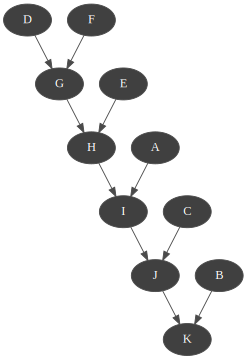

In [60]:
gnb.showBN(bn)